In [1]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# 데이터 특성의 수 : 13
# 이진분류 or 다중분류 or 회귀 : 회귀

# 분류 : 정답의 종류가 정해져있다. ex) 혈액형, MBTI
# 회귀 : 정답의 범위가 정해져있다. ex) 집값, 성적예측

In [3]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [4]:
# 딥러닝 모델 설계에 필요한 기능 불러오기
# 건물을 짓는다
from tensorflow.keras.models import Sequential # 딥러닝 모델의 틀, 건물 바닥 다지기
from tensorflow.keras.layers import Dense # 딥러닝 세부 설정, 건물에서 한 층 디자인하기

In [5]:
# 딥러닝 모델 설계
# 딥러닝 모델 객체 생성
model = Sequential()

# 딥러닝 세부설정
# 한 층씩 설정해줘야함
# Dense : 퍼셉트론 하나
# 입력층 : 데이터가 처음 들어가는 층
model.add(Dense(units = 30, input_dim = 13, activation = 'relu'))
# units : 퍼셉트론에서 사용할 가중치의 갯수
## 한 퍼셉트론이 할 수 있는 생각의 갯수
# input_dim : 입력 데이터 특성의 크기
## 첫 번째 층에만 작성
# activation : 활성화함수, 다음층으로 값을 넘기는 방법
## 다음층으로 값을 넘기기 전에 기존의 값을 한번 정리

# 중간층(은닉층) : 입력층, 출력층을 제외한 나머지 층
# 중간층 : 데이터에서 특징 찾기
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

# 출력층 : 가장 마지막에 나오는 층, 입력층과 중간층에서 분석한 값을 결론내리기
# units과 activation은 신경써서 적어야한다
model.add(Dense(units = 1, activation = 'linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 딥러닝 모델 학습 방법 설정
# 신경써서 적어야함
model.compile(
   loss = 'mean_squared_error', # 모델을 얼마나 수정해야하는지 계산할 값
   optimizer = 'adam', # 경사하강법의 종류 > 오차를 어떻게 반영할것인지
   metrics = ['mse'] # 모델이 잘 만들어졌는지 평가할 기준이 되는 값
)

In [7]:
# 학습하기
# epochs = 학습의 횟수
# 딥러닝 모델은 epochs만큼 발전하려고함
model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 251.1622 - mse: 251.1622
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100.7722 - mse: 100.7722 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.5027 - mse: 70.5027 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.6898 - mse: 58.6898  
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.5368 - mse: 56.5368 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.4339 - mse: 65.4339 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.1142 - mse: 67.1142  
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.5352 - mse: 60.5352  
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.9898 - mse: 50.9898 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.1198 - mse: 58.1198 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.7721 - mse: 60.7721 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.5854 - mse: 65.5

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 30, input_dim = 13, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])

h = model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 671.2419 - mse: 671.2419
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172.5477 - mse: 172.5477 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.4473 - mse: 93.4473   
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.6706 - mse: 68.6706 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.4988 - mse: 70.4988 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.6211 - mse: 57.6211 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.1105 - mse: 61.1105  
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64.6634 - mse: 64.6634  
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.8855 - mse: 65.8855 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.2901 - mse: 61.2901 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.2561 - mse: 55.2561  
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.2237 - mse: 61

In [ ]:
# 모델을 초기화하지 않으면 전에 학습에 이어서 학습을 한다.
h = model.fit(X_train,y_train, epochs = 100)

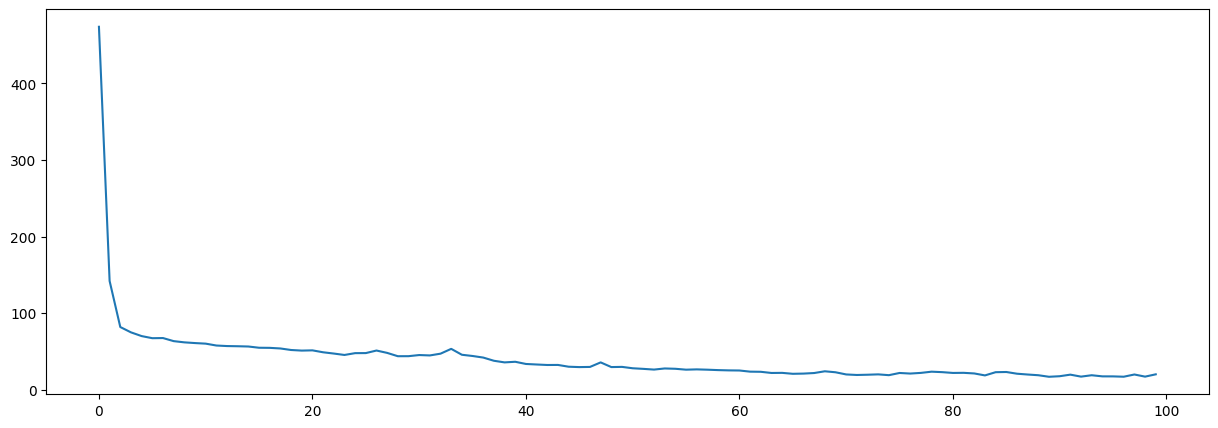

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5)) # 그래프 크기 조정
plt.plot(h.history['mse'])
plt.show()
# 딥러닝 모델은 매 학습시마다 모델을 개선시키려고 한다.
# 딥러닝 초기 가중치는 완전 랜덤
# 처음에 운이 좋으면 오차가 작음
# 처음에 운이 나쁘면 오차가 큼

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.6328 - mse: 24.6328
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.6959 - mse: 16.6959
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.1586 - mse: 17.1586  
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.2904 - mse: 15.2904 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.6711 - mse: 13.6711
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.3494 - mse: 16.3494  
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.4738 - mse: 15.4738 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7383 - mse: 17.7383 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.4347 - mse: 16.4347
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.9830 - mse: 13.9830 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.9347 - mse: 15.9347 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.7220 - mse: 16.7220 
Epo

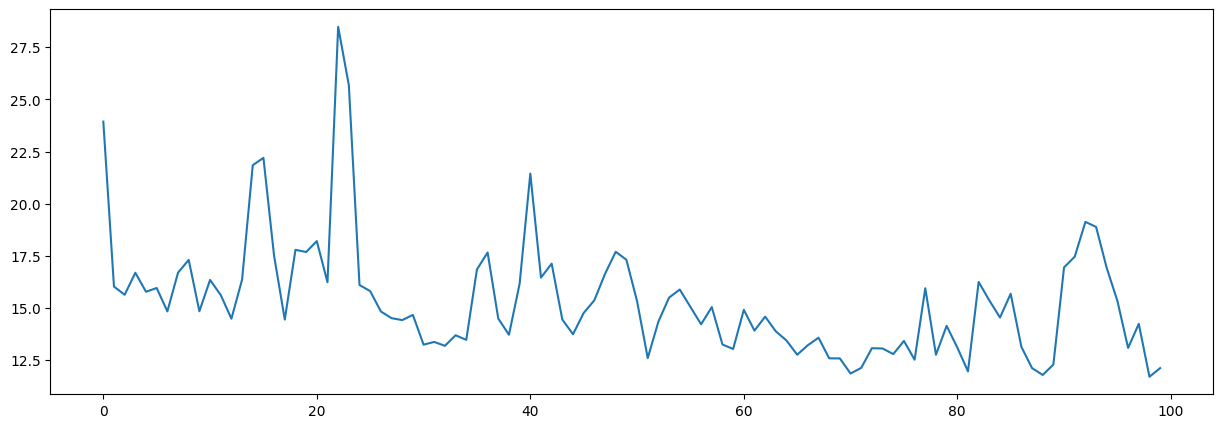

In [12]:
h = model.fit(X_train,y_train, epochs = 100)
plt.figure(figsize = (15,5)) # 그래프 크기 조정
plt.plot(h.history['mse'])
plt.show()